In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simulate 1 year of daily solar irradiance (kWh/m²/day)
np.random.seed(42)
days = pd.date_range(start='2025-01-01', periods=365)
solar_irradiance = np.random.normal(5, 1.2, size=365)  # Average ~5 kWh/m²/day

# Industrial daily energy demand (kWh)
energy_demand = np.random.normal(1000, 200, size=365)

# Create DataFrame
df = pd.DataFrame({
    'date': days,
    'solar_irradiance': solar_irradiance,
    'energy_demand': energy_demand
})

df.head()


,date,solar_irradiance,energy_demand
0,2025-01-01,5.596057,919.755906
1,2025-01-02,4.834083,1044.818496
2,2025-01-03,5.777226,1002.518480
3,2025-01-04,6.827636,1019.535220
4,2025-01-05,4.719016,845.398043


In [3]:
PV_capacity = 200  # kW
PV_efficiency = 0.18  # 18% typical
Area_factor = 1  # if normalized

df['energy_generated'] = df['solar_irradiance'] * PV_capacity * PV_efficiency * Area_factor


In [4]:
grid_emission_factor = 0.7  # kg CO2/kWh
df['carbon_reduction'] = df['energy_generated'] * grid_emission_factor


In [5]:
df['net_demand'] = df['energy_demand'] - df['energy_generated']
df['net_demand'] = df['net_demand'].apply(lambda x: max(x,0))  # no negative demand


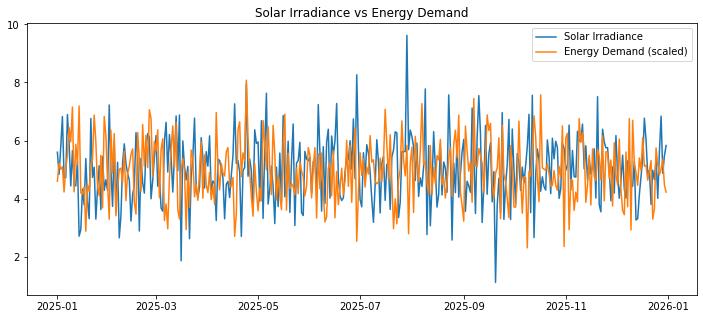

In [6]:
plt.figure(figsize=(12,5))
plt.plot(df['date'], df['solar_irradiance'], label='Solar Irradiance')
plt.plot(df['date'], df['energy_demand']/200, label='Energy Demand (scaled)')
plt.title('Solar Irradiance vs Energy Demand')
plt.legend()
plt.show()


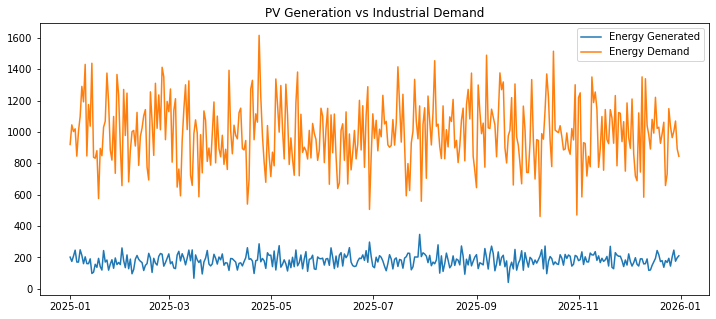

In [7]:
plt.figure(figsize=(12,5))
plt.plot(df['date'], df['energy_generated'], label='Energy Generated')
plt.plot(df['date'], df['energy_demand'], label='Energy Demand')
plt.title('PV Generation vs Industrial Demand')
plt.legend()
plt.show()


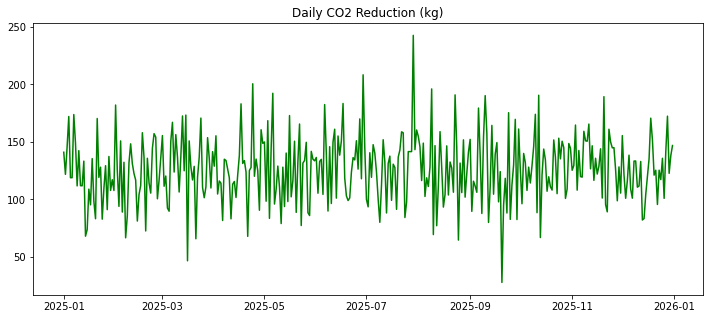

In [8]:
plt.figure(figsize=(12,5))
plt.plot(df['date'], df['carbon_reduction'], color='green')
plt.title('Daily CO2 Reduction (kg)')
plt.show()


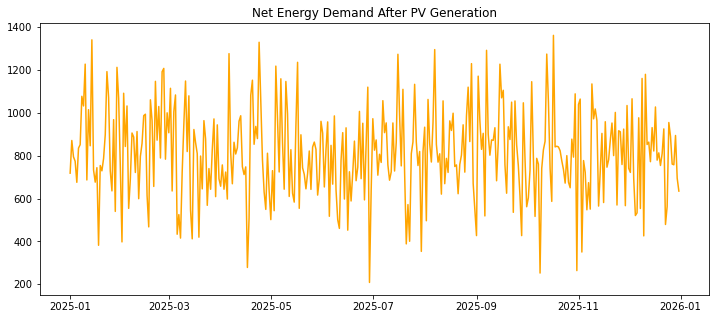

In [9]:
plt.figure(figsize=(12,5))
plt.plot(df['date'], df['net_demand'], color='orange')
plt.title('Net Energy Demand After PV Generation')
plt.show()


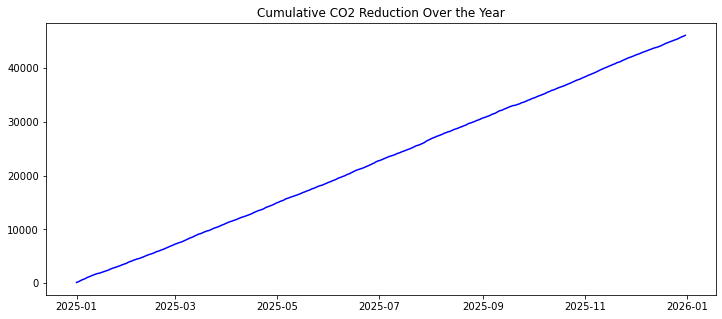

In [10]:
plt.figure(figsize=(12,5))
plt.plot(df['date'], df['carbon_reduction'].cumsum(), color='blue')
plt.title('Cumulative CO2 Reduction Over the Year')
plt.show()


In [11]:
best_capacity = 0
for capacity in range(50, 501, 50):  # 50kW to 500kW
    df['energy_generated'] = df['solar_irradiance'] * capacity * PV_efficiency
    unmet = (df['energy_demand'] - df['energy_generated']).clip(lower=0).sum()
    if unmet <= df['energy_demand'].sum() * 0.1:  # ≤10% unmet
        best_capacity = capacity
        break

print("Optimal PV capacity to meet 90% demand:", best_capacity, "kW")


Optimal PV capacity to meet 90% demand: 0 kW
